In [1]:
!pip install librosa

# Import Packages

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
#for loading and visualizing audio files
import librosa as lr
import librosa.display
import numpy as np


In [5]:
Sound_fpath = "./class_dir/"   ##Sound-files Path 
audio_clips = os.listdir(Sound_fpath)
print("No. of .MP3 files in audio folder = ",len(audio_clips))

No. of .MP3 files in audio folder =  1


In [8]:
audio_clips[0]

'Bent-Beak-Riffraff-86_seg_0.wav'

# Loading an Audio file 

In [6]:
signal, sr = librosa.load(Sound_fpath+audio_clips[0],duration=2)  # sr = sampling rate//3 sec split
print(type(signal), type(sr))
print(signal.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(44100,) 22050


# Some visualization

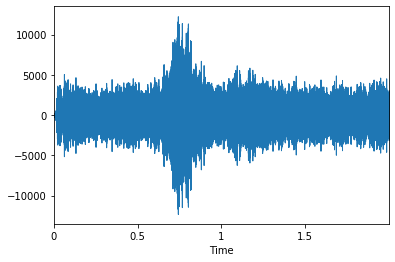

In [7]:
from librosa import display
librosa.display.waveplot(signal, sr=sr);

# Fourier Transform

In [9]:
spectrogram = librosa.stft(signal,
                           n_fft      = 1024,   ### param n_fft: number of bins for FFT 
                           hop_length = 512)

In [10]:
type(spectrogram)  

numpy.ndarray

# Display the Spectrogram

C:\Users\Aymane\AppData\Local\Continuum\anaconda3\lib\site-packages\librosa\display.py:725: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


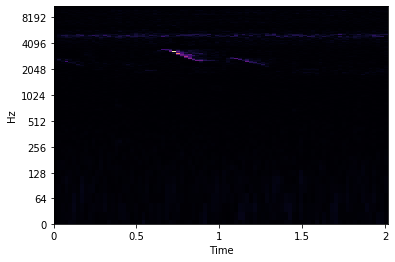

In [11]:
librosa.display.specshow(spectrogram, y_axis='log', x_axis='time');

# Log-amplitude transformation / Decibel Transformation

What is Decibel ?
- The decibel (symbol: dB) is a relative unit of measurement corresponding to one tenth of bel. It is used to express the ratio of one value of a power or field quantity to another, on a logarithmic scale, the logarithmic quantity being called the power level or field level.
-The decibel is commonly used in acoustics as a unit of sound pressure level. The reference pressure for sound in air is set at the typical threshold of perception of an average human and there are common comparisons used to illustrate different levels of sound pressure. Sound pressure is a field quantity 

In [12]:
spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)

C:\Users\Aymane\AppData\Local\Continuum\anaconda3\lib\site-packages\librosa\core\spectrum.py:1700: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


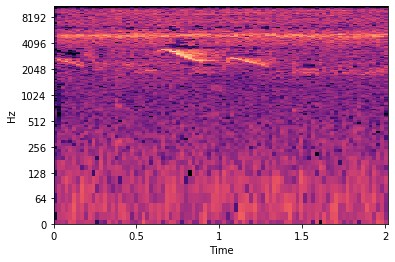

In [13]:
###Show spectrogram 
librosa.display.specshow(spectrogram_db, y_axis='log', x_axis='time');

# Mel-transform

What is Mel-transform ?


In sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC. They are derived from a type of cepstral representation of the audio clip (a nonlinear "spectrum-of-a-spectrum"). The difference between the cepstrum and the mel-frequency cepstrum is that in the MFC, the frequency bands are equally spaced on the mel scale, which approximates the human auditory system's response more closely than the linearly-spaced frequency bands used in the normal cepstrum. This frequency warping can allow for better representation of sound, for example, in audio compression.

MFCCs are commonly derived as follows:

    Take the Fourier transform of (a windowed excerpt of) a signal.
    Map the powers of the spectrum obtained above onto the mel scale, using triangular overlapping windows.
    Take the logs of the powers at each of the mel frequencies.
    Take the discrete cosine transform of the list of mel log powers, as if it were a signal.
    The MFCCs are the amplitudes of the resulting spectrum.

In [14]:
power_spectrogram = np.abs(spectrogram)**2

melspec= librosa.feature.melspectrogram(S= power_spectrogram,
                                                   n_mels = 80,
                                                   fmax   = 8000)

In [15]:
melspec_db = librosa.power_to_db(melspec, ref = np.max)

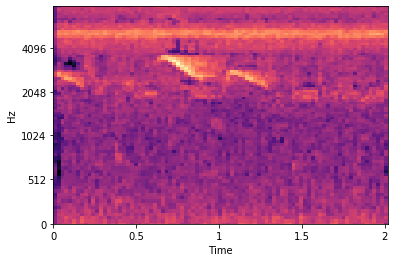

In [16]:
librosa.display.specshow(melspec_db, y_axis='mel', fmax=8000, x_axis='time');

# Save some Spectrograms

In [17]:
from PIL import Image
window = np.hanning(window_size)  
spectrogram = 2 * np.abs(spectrogram) / np.sum(window) ###spectrogram is the stft

NameError: name 'window_size' is not defined

In [18]:
fig = plt.Figure()
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)
p = librosa.display.specshow(spectrogram_db, ax=ax, y_axis='log', x_axis='time')##the 1st argument is the Decibel transfo
fig.savefig('./save/spec1.png') ###you sfecify where u wanna put the image

NameError: name 'FigureCanvas' is not defined

Here is the general Process:



1- Compute stfs


2- perform 2 * np.abs(out) / np.sum(window)



3- Compute amplitude to DB



4- specshow(amplitude to DB,y-axis,x-axis)

In [72]:
# from PIL import Image
# window = np.hanning(window_size)
# out  = librosa.core.spectrum.stft(y, n_fft = window_size, hop_length = 512, #### First short time Fourier Transform
#       window=window)
# out = 2 * np.abs(out) / np.sum(window)

In [74]:
# fig = plt.Figure()
# canvas = FigureCanvas(fig)
# ax = fig.add_subplot(111)
# p = librosa.display.specshow(librosa.amplitude_to_db(out, ref=np.max), ax=ax, y_axis='log', x_axis='time')
# fig.savefig('spec2.png')

# Vocal Separation

In [109]:
# And compute the spectrogram magnitude and phase
S_full, phase = librosa.magphase(librosa.stft(signal))

In [110]:
S_full

array([[1.06170643e-04, 1.51654574e-04, 3.40400758e-04, ...,
        3.71992402e-02, 2.24913079e-02, 2.99441512e-03],
       [4.76689966e-05, 1.91483734e-04, 5.33992134e-04, ...,
        1.87442414e-02, 2.59918198e-02, 2.28424612e-02],
       [5.37042251e-05, 2.20687565e-04, 2.57429521e-04, ...,
        1.42212654e-03, 1.47078549e-02, 3.90524790e-02],
       ...,
       [7.03378689e-08, 5.04868289e-08, 4.54221549e-07, ...,
        3.48248024e-04, 1.02557475e-02, 2.89632510e-02],
       [3.02363574e-08, 1.36286573e-07, 3.59943414e-07, ...,
        7.68671278e-04, 1.08217411e-02, 2.91640777e-02],
       [1.38858631e-08, 1.76351705e-07, 5.40889801e-07, ...,
        1.21992512e-03, 9.75492038e-03, 2.90211104e-02]], dtype=float32)

In [ ]:
def plot_statistics_and_filter(
    mean_freq_noise, std_freq_noise, noise_thresh, smoothing_filter
):
    fig, ax = plt.subplots(ncols=2, figsize=(20, 4))
    plt_mean, = ax[0].plot(mean_freq_noise, label="Mean power of noise")
    plt_std, = ax[0].plot(std_freq_noise, label="Std. power of noise")
    plt_std, = ax[0].plot(noise_thresh, label="Noise threshold (by frequency)")
    ax[0].set_title("Threshold for mask")
    ax[0].legend()
    cax = ax[1].matshow(smoothing_filter, origin="lower")
    fig.colorbar(cax)
    ax[1].set_title("Filter for smoothing Mask")
    plt.show()


Plot a 5s slice of the spectrum : 

In [123]:
idx = slice(*librosa.time_to_frames([30, 35], sr=sr))
idx

slice(1291, 1507, None)

In [137]:
p = librosa.effects.split(signal, top_db=7, frame_length=2048, hop_length=512)
p

array([[20992, 23040],
       [37888, 40448],
       [41472, 44544],
       [46080, 50688],
       [63488, 64512]])

# Constant Q-transform

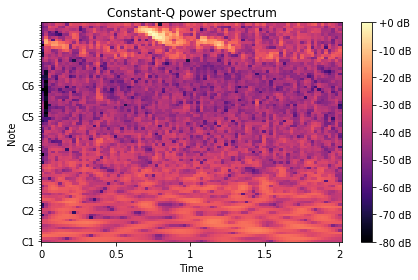

In [27]:
import matplotlib.pyplot as plt

C = np.abs(librosa.cqt(signal, sr=sr))
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                          sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')
plt.tight_layout()
plt.show()


In [28]:
fig.savefig('./save/CQ1.png') ###you sfecify where u wanna put the image